## Soar into Data - EDA
---

### Contents
1. Imports
2. Data overview
3. Data Visualziation
4. Data Cleaning

---

#### 1. Imports

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

---

#### 2. Data Overview

This is where we look at the data and check out all the features, what data types it holds, and what is means in the dataset

In [168]:
skin_data = pd.read_csv('./isic-2024-challenge/train-metadata.csv')

/var/folders/_h/v0t9lgvx06g5lqdwl364573w0000gn/T/ipykernel_66402/3958710016.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  skin_data = pd.read_csv('./isic-2024-challenge/train-metadata.csv')


In [169]:
skin_data.head()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [170]:
skin_data.describe()

,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,mel_thick_mm,tbp_lv_dnn_lesion_confidence
count,401059.000000,398261.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,...,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,63.000000,4.010590e+05
mean,0.000980,58.012986,3.930827,19.974007,14.919247,28.281706,26.913015,34.786341,30.921279,54.653689,...,1.016459,2.715190,2.238605,0.306823,86.332073,-3.091862,1039.598221,55.823389,0.670952,9.716220e+01
std,0.031288,13.596165,1.743068,3.999489,3.529384,5.278676,4.482994,5.708469,4.829345,5.520849,...,0.734631,1.738165,0.623884,0.125038,52.559511,197.257995,409.819653,87.968245,0.792798,8.995782e+00
min,0.000000,5.000000,1.000000,-2.487115,-9.080269,-0.730989,9.237066,3.054228,11.846520,-1.574164,...,0.000000,0.268160,0.636247,0.052034,0.000000,-624.870728,-1052.134000,-291.890442,0.200000,1.261082e-16
25%,0.000000,50.000000,2.840000,17.330821,12.469740,24.704372,23.848125,31.003148,27.658285,51.566273,...,0.563891,1.456570,1.834745,0.211429,40.000000,-147.022125,746.519673,-8.962647,0.300000,9.966882e+01
50%,0.000000,60.000000,3.370000,19.801910,14.713930,28.171570,26.701704,34.822580,30.804893,55.035632,...,0.902281,2.186693,2.149758,0.282297,90.000000,-5.747253,1172.803000,67.957947,0.400000,9.999459e+01
75%,0.000000,70.000000,4.380000,22.304628,17.137175,31.637429,29.679913,38.430298,33.963868,58.298184,...,1.334523,3.474565,2.531443,0.382022,130.000000,140.474835,1342.131540,126.611567,0.600000,9.999996e+01
max,1.000000,85.000000,28.400000,48.189610,37.021680,54.306900,48.372700,58.765170,54.305290,105.875784,...,11.491140,17.563650,25.534791,0.977055,175.000000,614.471700,1887.766846,319.407000,5.000000,1.000000e+02


In [171]:
feature_datapoints = skin_data.count()
print(feature_datapoints)

isic_id                         401059
target                          401059
patient_id                      401059
age_approx                      398261
sex                             389542
anatom_site_general             395303
clin_size_long_diam_mm          401059
image_type                      401059
tbp_tile_type                   401059
tbp_lv_A                        401059
tbp_lv_Aext                     401059
tbp_lv_B                        401059
tbp_lv_Bext                     401059
tbp_lv_C                        401059
tbp_lv_Cext                     401059
tbp_lv_H                        401059
tbp_lv_Hext                     401059
tbp_lv_L                        401059
tbp_lv_Lext                     401059
tbp_lv_areaMM2                  401059
tbp_lv_area_perim_ratio         401059
tbp_lv_color_std_mean           401059
tbp_lv_deltaA                   401059
tbp_lv_deltaB                   401059
tbp_lv_deltaL                   401059
tbp_lv_deltaLB           

55 Features across a total of 401,059 datapoints 

37 numerical features and 18 categorical features 



In [172]:
numerical_features = skin_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = skin_data.select_dtypes(include=['object']).columns.tolist()

features_df = pd.DataFrame({
    "Feature Type": ["Numerical"] * len(numerical_features) + ["Categorical"] * len(categorical_features),
    "Feature Name": numerical_features + categorical_features
})
print(features_df)

   Feature Type                  Feature Name
0     Numerical                        target
1     Numerical                    age_approx
2     Numerical        clin_size_long_diam_mm
3     Numerical                      tbp_lv_A
4     Numerical                   tbp_lv_Aext
5     Numerical                      tbp_lv_B
6     Numerical                   tbp_lv_Bext
7     Numerical                      tbp_lv_C
8     Numerical                   tbp_lv_Cext
9     Numerical                      tbp_lv_H
10    Numerical                   tbp_lv_Hext
11    Numerical                      tbp_lv_L
12    Numerical                   tbp_lv_Lext
13    Numerical                tbp_lv_areaMM2
14    Numerical       tbp_lv_area_perim_ratio
15    Numerical         tbp_lv_color_std_mean
16    Numerical                 tbp_lv_deltaA
17    Numerical                 tbp_lv_deltaB
18    Numerical                 tbp_lv_deltaL
19    Numerical                tbp_lv_deltaLB
20    Numerical            tbp_lv_

In [173]:
benign = skin_data['target'].value_counts()[0] # benign
malignant = skin_data['target'].value_counts()[1] # malignant
print(f'Dataset contains {benign} benign classifications and {malignant} malignant classifications. Each associated with a unique image')

Dataset contains 400666 benign classifications and 393 malignant classifications. Each associated with a unique image


Lets double check for FP, and FN (i.e a misdiagnosis)

In [174]:
false_positives = skin_data[(skin_data['target'] == 0) & (skin_data['iddx_full'].str.contains('Malignant', na=False))]
false_negatives = skin_data[(skin_data['target'] == 1) & (~skin_data['iddx_full'].str.contains('Malignant', na=False))]

print(f"False Positives (FP): {len(false_positives)}")
print(f"False Negatives (FN): {len(false_negatives)}")

False Positives (FP): 0
False Negatives (FN): 0


#### 3. Data Visualization

Let's focus on the malignant cases

In [175]:
malignant = skin_data[skin_data['target'] == 1]
benign = skin_data[skin_data['target'] == 0]

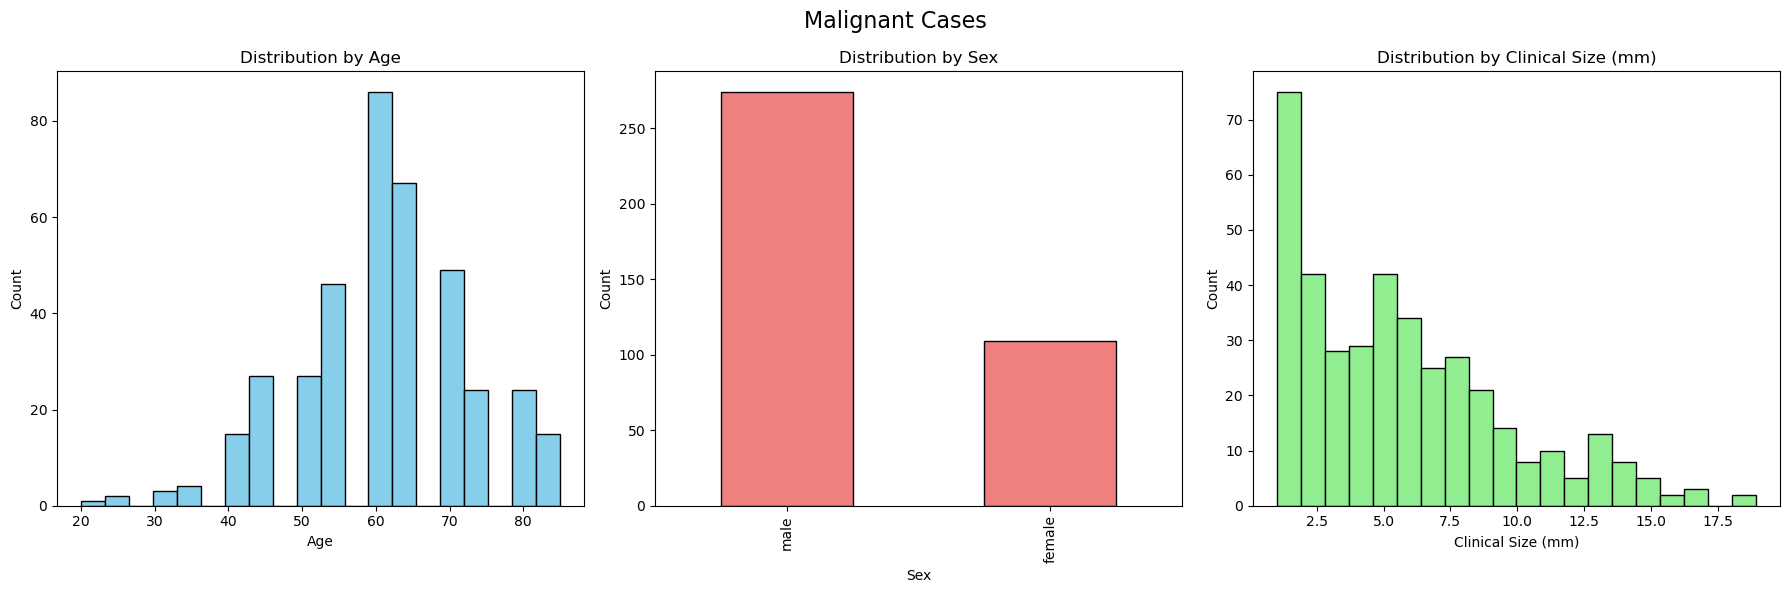

In [176]:
def plot_malignant_cases(malignant_cases):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Plot 1: Distribution by Age
    axes[0].hist(malignant_cases['age_approx'], bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title('Distribution by Age')
    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('Count')

    # Plot 2: Distribution by Sex
    malignant_cases['sex'].value_counts().plot(kind='bar', ax=axes[1], color='lightcoral', edgecolor='black')
    axes[1].set_title('Distribution by Sex')
    axes[1].set_xlabel('Sex')
    axes[1].set_ylabel('Count')

    # Plot 3: Distribution by Clinical Size
    axes[2].hist(malignant_cases['clin_size_long_diam_mm'], bins=20, color='lightgreen', edgecolor='black')
    axes[2].set_title('Distribution by Clinical Size (mm)')
    axes[2].set_xlabel('Clinical Size (mm)')
    axes[2].set_ylabel('Count')

    fig.suptitle('Malignant Cases', fontsize=16)
    plt.tight_layout()
    plt.show()

plot_malignant_cases(malignant)


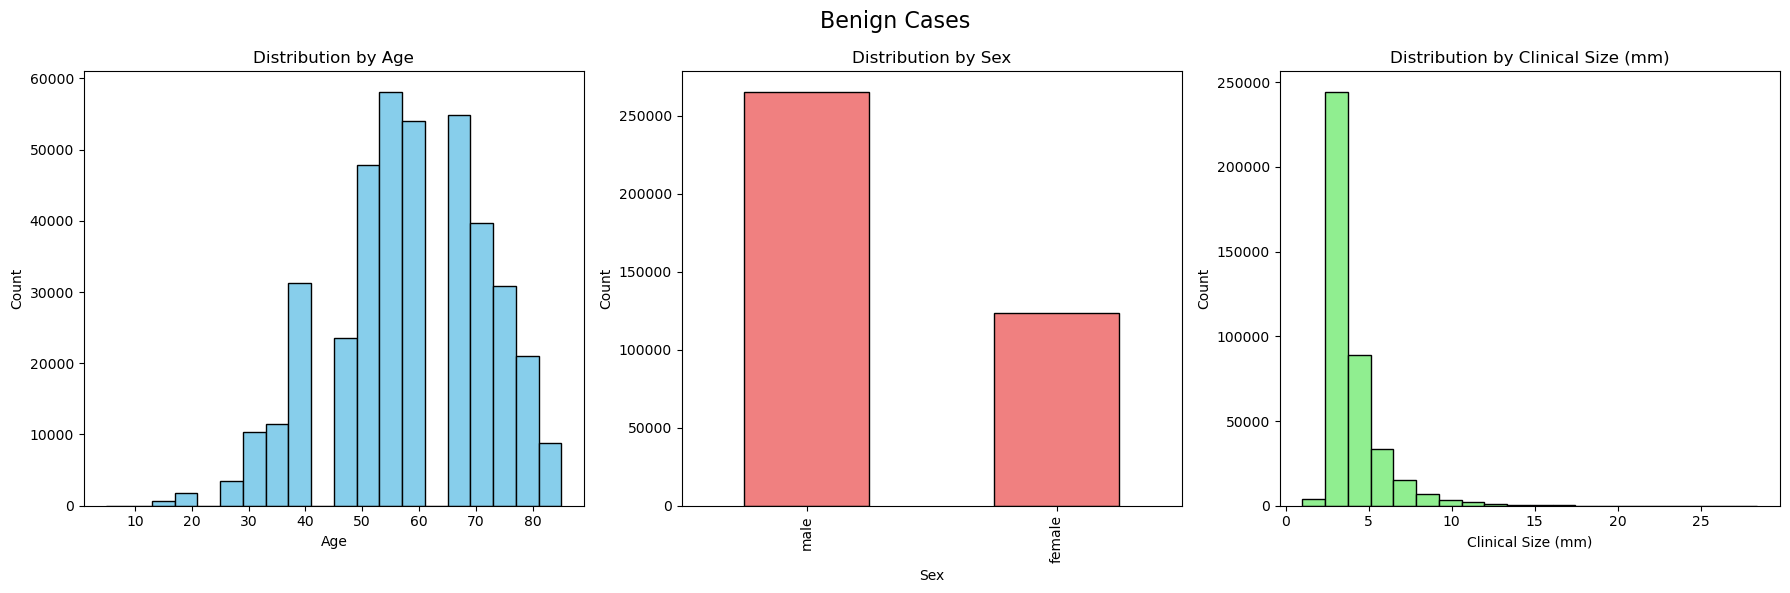

In [177]:
def plot_benign_cases(benign_cases):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Plot 1: Distribution by Age
    axes[0].hist(benign_cases['age_approx'], bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title('Distribution by Age')
    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('Count')

    # Plot 2: Distribution by Sex
    benign_cases['sex'].value_counts().plot(kind='bar', ax=axes[1], color='lightcoral', edgecolor='black')
    axes[1].set_title('Distribution by Sex')
    axes[1].set_xlabel('Sex')
    axes[1].set_ylabel('Count')

    # Plot 3: Distribution by Clinical Size
    axes[2].hist(benign_cases['clin_size_long_diam_mm'], bins=20, color='lightgreen', edgecolor='black')
    axes[2].set_title('Distribution by Clinical Size (mm)')
    axes[2].set_xlabel('Clinical Size (mm)')
    axes[2].set_ylabel('Count')

    fig.suptitle('Benign Cases', fontsize=16)
    plt.tight_layout()
    
    plt.show()

plot_benign_cases(benign)

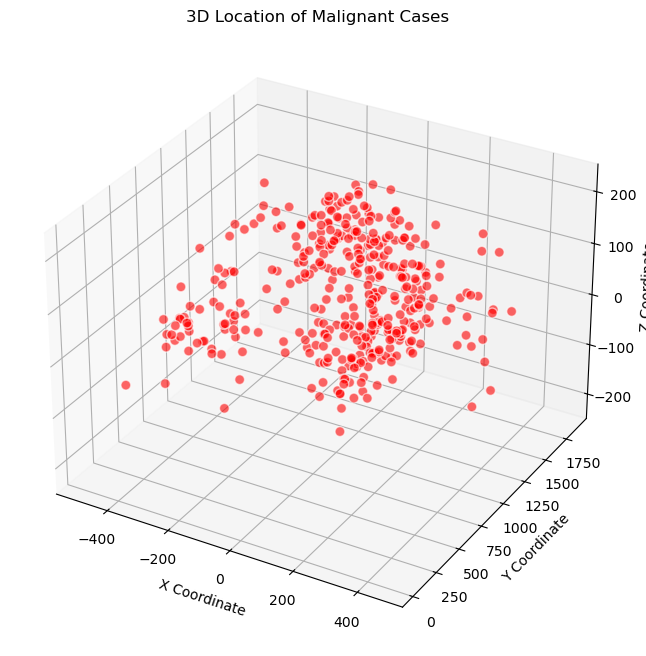

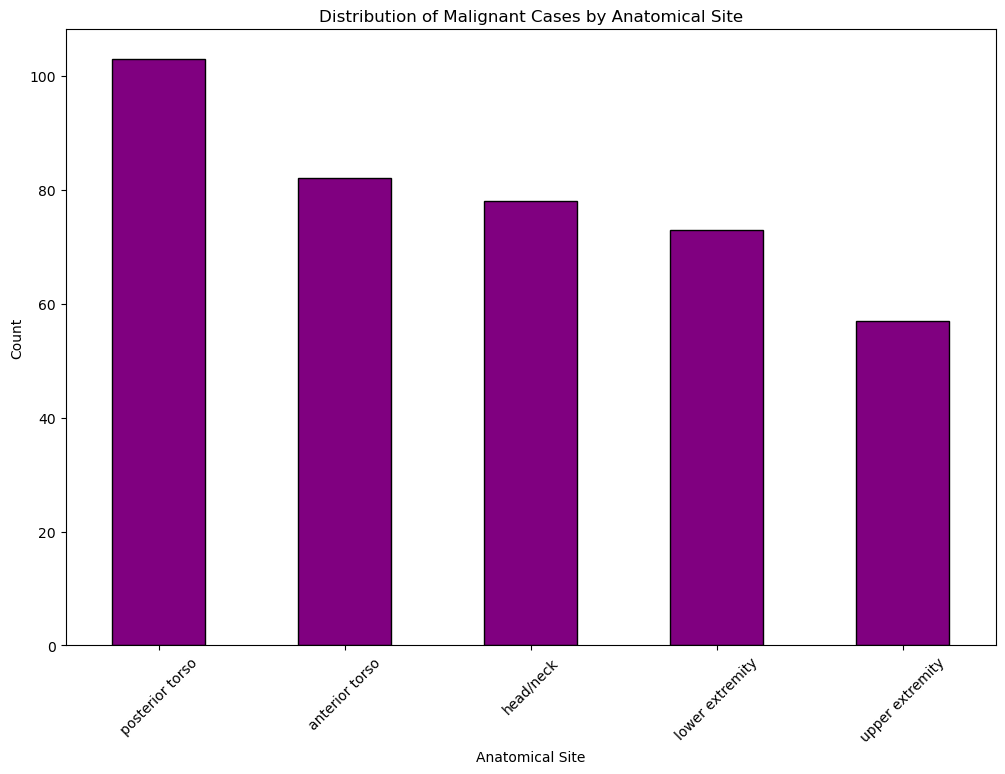

In [178]:
def plot_malignant_locations(malignant_cases):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(
        malignant_cases['tbp_lv_x'], 
        malignant_cases['tbp_lv_y'], 
        malignant_cases['tbp_lv_z'], 
        c='red', 
        alpha=0.6, 
        edgecolor='w', 
        s=50
    )
    ax.set_title('3D Location of Malignant Cases')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Z Coordinate')
    plt.show()

plot_malignant_locations(malignant)

def plot_anatom_site_distribution(malignant_cases):
    plt.figure(figsize=(12, 8))
    malignant_cases['anatom_site_general'].value_counts().plot(kind='bar', color='purple', edgecolor='black')
    plt.title('Distribution of Malignant Cases by Anatomical Site')
    plt.xlabel('Anatomical Site')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

plot_anatom_site_distribution(malignant)

#### 4. Data Cleaning 
---

In [179]:
skin_data = skin_data.drop(columns=['iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index', 'mel_thick_mm', 'lesion_id', 'copyright_license', 'patient_id', 'image_type','tbp_tile_type','attribution'])

skin_data = skin_data.dropna()

skin_data.describe()

,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,...,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,tbp_lv_dnn_lesion_confidence
count,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,...,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,3.819140e+05
mean,0.000998,57.993082,3.933714,19.949312,14.907976,28.170619,26.805857,34.680555,30.821552,54.585460,...,11.891980,1.018080,2.715964,2.243471,0.307173,86.352268,-2.959038,1039.370333,55.981827,9.714498e+01
std,0.031569,13.668582,1.745646,3.983557,3.511679,5.229249,4.437515,5.659655,4.780907,5.511701,...,5.932878,0.735155,1.736657,0.622774,0.125076,52.561128,196.764562,409.341374,87.971225,9.027496e+00
min,0.000000,5.000000,1.000000,-2.487115,-9.080269,-0.730989,9.237066,3.054228,11.846520,-1.574164,...,2.579237,0.000000,0.320329,0.636247,0.052034,0.000000,-624.870728,-1052.134000,-291.890442,1.261082e-16
25%,0.000000,50.000000,2.840000,17.322385,12.474831,24.635740,23.782231,30.934328,27.595161,51.510338,...,8.338364,0.564601,1.459075,1.839337,0.211765,40.000000,-146.492453,746.849147,-8.876999,9.965759e+01
50%,0.000000,60.000000,3.370000,19.778390,14.708640,28.068779,26.601681,34.724055,30.714839,54.967332,...,10.015440,0.903646,2.187907,2.155276,0.282828,90.000000,-5.432915,1172.721313,68.174345,9.999434e+01
75%,0.000000,70.000000,4.380000,22.267498,17.118785,31.487008,29.528269,38.288499,33.834040,58.218206,...,13.242335,1.336739,3.473811,2.537656,0.382353,130.000000,140.213950,1341.575055,126.711459,9.999995e+01
max,1.000000,85.000000,28.040000,48.189610,37.021680,54.306900,48.372700,58.765170,54.305290,105.875784,...,93.758999,11.491140,17.563650,25.534791,0.977055,175.000000,614.471700,1887.766846,319.407000,1.000000e+02


In [180]:
def create_image_path_col(dataset: 'pd.dataframe') -> 'pd.dataframe':
    """
    Create a column with the image path for each image in the dataset.
    """
    dataset['image_path'] = dataset['isic_id'].apply(lambda x: f'./isic-2024-challenge/train-image/image/{x}.jpg')
    dataset = dataset[['image_path', 'target']]
    return dataset


skin_data_images = create_image_path_col(skin_data)

# print(skin_data_images.iloc[0]['image_path'])



In [181]:
# Move datapoints with target == 1 to the front
sorted_skin_data = pd.concat([skin_data[skin_data['target'] == 1], skin_data[skin_data['target'] == 0]])

# Extract the first 20,000 datapoints
top_20000_data = sorted_skin_data.head(20000)

# Get the label and image_path columns
top_20000_label_and_path = top_20000_data[['target', 'image_path']]
print(top_20000_label_and_path)

top_20000_label_and_path = top_20000_label_and_path.to_csv('label_and_path.csv', index=False)


       target                                         image_path
387         1  ./isic-2024-challenge/train-image/image/ISIC_0...
935         1  ./isic-2024-challenge/train-image/image/ISIC_0...
1245        1  ./isic-2024-challenge/train-image/image/ISIC_0...
1846        1  ./isic-2024-challenge/train-image/image/ISIC_0...
3478        1  ./isic-2024-challenge/train-image/image/ISIC_0...
...       ...                                                ...
20611       0  ./isic-2024-challenge/train-image/image/ISIC_0...
20612       0  ./isic-2024-challenge/train-image/image/ISIC_0...
20614       0  ./isic-2024-challenge/train-image/image/ISIC_0...
20615       0  ./isic-2024-challenge/train-image/image/ISIC_0...
20616       0  ./isic-2024-challenge/train-image/image/ISIC_0...

[20000 rows x 2 columns]


In [182]:
categorical_features = skin_data.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)


['isic_id', 'sex', 'anatom_site_general', 'tbp_lv_location', 'tbp_lv_location_simple', 'iddx_full', 'iddx_1', 'image_path']


In [183]:
# from sklearn.preprocessing import LabelEncoder


# columns_to_encode = ['sex', 'anatom_site_general', 'tbp_lv_location', 'tbp_lv_location_simple', 'iddx_full', 'iddx_1']


# label_encoders = {}


# for column in columns_to_encode:
#     le = LabelEncoder()
#     skin_data[column] = le.fit_transform(skin_data[column].astype(str))
#     label_encoders[column] = le


# for column in columns_to_encode:
#     original_unique_values = skin_data[column].unique()
#     decoded_values = label_encoders[column].inverse_transform(skin_data[column].unique())


#     for column in columns_to_encode:
#         skin_data[column + '_encoded'] = skin_data[column]



In [184]:
skin_data.describe()

,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,...,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,tbp_lv_dnn_lesion_confidence
count,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,...,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,381914.000000,3.819140e+05
mean,0.000998,57.993082,3.933714,19.949312,14.907976,28.170619,26.805857,34.680555,30.821552,54.585460,...,11.891980,1.018080,2.715964,2.243471,0.307173,86.352268,-2.959038,1039.370333,55.981827,9.714498e+01
std,0.031569,13.668582,1.745646,3.983557,3.511679,5.229249,4.437515,5.659655,4.780907,5.511701,...,5.932878,0.735155,1.736657,0.622774,0.125076,52.561128,196.764562,409.341374,87.971225,9.027496e+00
min,0.000000,5.000000,1.000000,-2.487115,-9.080269,-0.730989,9.237066,3.054228,11.846520,-1.574164,...,2.579237,0.000000,0.320329,0.636247,0.052034,0.000000,-624.870728,-1052.134000,-291.890442,1.261082e-16
25%,0.000000,50.000000,2.840000,17.322385,12.474831,24.635740,23.782231,30.934328,27.595161,51.510338,...,8.338364,0.564601,1.459075,1.839337,0.211765,40.000000,-146.492453,746.849147,-8.876999,9.965759e+01
50%,0.000000,60.000000,3.370000,19.778390,14.708640,28.068779,26.601681,34.724055,30.714839,54.967332,...,10.015440,0.903646,2.187907,2.155276,0.282828,90.000000,-5.432915,1172.721313,68.174345,9.999434e+01
75%,0.000000,70.000000,4.380000,22.267498,17.118785,31.487008,29.528269,38.288499,33.834040,58.218206,...,13.242335,1.336739,3.473811,2.537656,0.382353,130.000000,140.213950,1341.575055,126.711459,9.999995e+01
max,1.000000,85.000000,28.040000,48.189610,37.021680,54.306900,48.372700,58.765170,54.305290,105.875784,...,93.758999,11.491140,17.563650,25.534791,0.977055,175.000000,614.471700,1887.766846,319.407000,1.000000e+02


In [185]:
# skin_data.to_csv('skin_data.csv', index=False)

In [186]:
# print(skin_data_images.iloc[0]['image_path'])
# print(processed_skin_data.iloc[0]['image_path'])

# benign = skin_data['target'].value_counts()[0] # benign
# malignant = skin_data['target'].value_counts()[1] # malignant
# print(f'Dataset contains {benign} benign classifications and {malignant} malignant classifications. Each associated with a unique image')